In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"
key = "z"
quantile = "1"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

11it [00:00, 108.25it/s]

27it [00:00, 119.05it/s]

43it [00:00, 128.44it/s]

58it [00:00, 132.37it/s]

73it [00:00, 136.47it/s]

88it [00:00, 139.71it/s]

102it [00:00, 137.55it/s]

116it [00:00, 131.56it/s]

129it [00:00, 117.31it/s]

144it [00:01, 125.06it/s]

157it [00:01, 124.06it/s]

173it [00:01, 132.42it/s]

187it [00:01, 123.30it/s]

200it [00:01, 113.99it/s]

212it [00:01, 111.11it/s]

226it [00:01, 118.20it/s]

240it [00:01, 120.65it/s]

254it [00:01, 125.66it/s]

268it [00:02, 129.26it/s]

282it [00:02, 127.31it/s]

297it [00:02, 132.31it/s]

313it [00:02, 137.72it/s]

329it [00:02, 143.33it/s]

345it [00:02, 146.78it/s]

361it [00:02, 150.12it/s]

377it [00:02, 144.23it/s]

394it [00:02, 149.11it/s]

410it [00:03, 150.38it/s]

426it [00:03, 152.92it/s]

442it [00:03, 154.80it/s]

459it [00:03, 156.51it/s]

475it [00:03, 151.97it/s]

491it [00:03, 143.29it/s]

506it [00:03, 144.49it/s]

521it [00:03, 145.09it/s]

536it [00:03, 145.67it/s]

552it [00:03, 148.55it/s]

568it [00:04, 151.37it/s]

584it [00:04, 152.91it/s]

600it [00:04, 153.67it/s]

616it [00:04, 154.12it/s]

632it [00:04, 152.62it/s]

648it [00:04, 153.91it/s]

664it [00:04, 120.25it/s]

678it [00:04, 123.38it/s]

692it [00:05, 123.03it/s]

708it [00:05, 131.31it/s]

722it [00:05, 131.98it/s]

736it [00:05, 127.62it/s]

750it [00:05, 128.94it/s]

766it [00:05, 136.56it/s]

782it [00:05, 141.52it/s]

797it [00:05, 126.27it/s]

811it [00:05, 116.66it/s]

824it [00:06, 110.26it/s]

840it [00:06, 120.61it/s]

856it [00:06, 128.98it/s]

872it [00:06, 136.40it/s]

887it [00:06, 123.61it/s]

900it [00:06, 118.98it/s]

913it [00:06, 112.38it/s]

928it [00:06, 120.64it/s]

944it [00:07, 129.51it/s]

958it [00:07, 107.07it/s]

970it [00:07, 103.48it/s]

985it [00:07, 113.60it/s]

998it [00:07, 108.13it/s]

1010it [00:07, 104.20it/s]

1024it [00:07, 112.54it/s]

1039it [00:07, 121.47it/s]

1055it [00:07, 129.71it/s]

1071it [00:08, 137.00it/s]

1087it [00:08, 142.27it/s]

1102it [00:08, 141.70it/s]

1117it [00:08, 135.28it/s]

1131it [00:08, 135.47it/s]

1148it [00:08, 142.22it/s]

1165it [00:08, 147.80it/s]

1182it [00:08, 152.08it/s]

1198it [00:08, 152.59it/s]

1215it [00:09, 155.74it/s]

1231it [00:09, 148.61it/s]

1247it [00:09, 151.50it/s]

1264it [00:09, 153.95it/s]

1281it [00:09, 156.17it/s]

1297it [00:09, 157.20it/s]

1313it [00:09, 157.59it/s]

1329it [00:09, 156.34it/s]

1345it [00:09, 130.97it/s]

1359it [00:10, 130.42it/s]

1376it [00:10, 138.15it/s]

1391it [00:10, 139.32it/s]

1408it [00:10, 145.93it/s]

1425it [00:10, 151.20it/s]

1442it [00:10, 154.17it/s]

1459it [00:10, 157.37it/s]

1476it [00:10, 160.25it/s]

1493it [00:10, 160.15it/s]

1510it [00:10, 159.08it/s]

1527it [00:11, 161.65it/s]

1544it [00:11, 163.01it/s]

1561it [00:11, 163.38it/s]

1578it [00:11, 163.23it/s]

1578it [00:11, 138.34it/s]


0it [00:00, ?it/s]

15it [00:00, 141.60it/s]

Number of empty sat catalogs is 49


26it [00:00, 127.22it/s]

37it [00:00, 118.50it/s]

47it [00:00, 110.56it/s]

57it [00:00, 106.03it/s]

68it [00:00, 105.12it/s]

79it [00:00, 103.83it/s]

90it [00:00, 104.15it/s]

101it [00:00, 104.47it/s]

118it [00:01, 117.43it/s]

134it [00:01, 126.16it/s]

150it [00:01, 134.21it/s]

164it [00:01, 116.28it/s]

177it [00:01, 115.33it/s]

193it [00:01, 125.69it/s]

210it [00:01, 136.03it/s]

227it [00:01, 144.31it/s]

243it [00:01, 148.22it/s]

259it [00:02, 150.56it/s]

276it [00:02, 153.91it/s]

292it [00:02, 153.47it/s]

308it [00:02, 154.32it/s]

324it [00:02, 150.83it/s]

340it [00:02, 153.37it/s]

356it [00:02, 155.23it/s]

372it [00:02, 156.39it/s]

389it [00:02, 158.41it/s]

406it [00:02, 159.34it/s]

423it [00:03, 160.56it/s]

440it [00:03, 158.29it/s]

457it [00:03, 159.24it/s]

474it [00:03, 159.23it/s]

490it [00:03, 135.19it/s]

505it [00:03, 123.80it/s]

519it [00:03, 127.92it/s]

533it [00:03, 118.50it/s]

548it [00:04, 125.09it/s]

563it [00:04, 130.74it/s]

578it [00:04, 134.67it/s]

595it [00:04, 142.60it/s]

610it [00:04, 138.28it/s]

627it [00:04, 144.94it/s]

644it [00:04, 150.35it/s]

660it [00:04, 148.59it/s]

677it [00:04, 153.24it/s]

694it [00:05, 152.00it/s]

710it [00:05, 148.40it/s]

725it [00:05, 140.13it/s]

741it [00:05, 145.33it/s]

758it [00:05, 149.63it/s]

774it [00:05, 152.04it/s]

791it [00:05, 154.83it/s]

807it [00:05, 155.73it/s]

823it [00:05, 156.15it/s]

841it [00:05, 160.18it/s]

858it [00:06, 160.65it/s]

875it [00:06, 161.42it/s]

892it [00:06, 162.16it/s]

909it [00:06, 162.12it/s]

926it [00:06, 156.55it/s]

942it [00:06, 147.07it/s]

958it [00:06, 149.55it/s]

975it [00:06, 153.07it/s]

992it [00:06, 157.45it/s]

1008it [00:07, 137.57it/s]

1023it [00:07, 124.64it/s]

1037it [00:07, 118.23it/s]

1050it [00:07, 109.13it/s]

1062it [00:07, 111.64it/s]

1079it [00:07, 122.90it/s]

1096it [00:07, 132.25it/s]

1110it [00:07, 125.34it/s]

1128it [00:08, 136.52it/s]

1145it [00:08, 143.06it/s]

1163it [00:08, 151.54it/s]

1179it [00:08, 152.81it/s]

1195it [00:08, 149.01it/s]

1212it [00:08, 152.88it/s]

1229it [00:08, 157.13it/s]

1246it [00:08, 158.53it/s]

1263it [00:08, 159.09it/s]

1280it [00:08, 160.84it/s]

1297it [00:09, 162.99it/s]

1314it [00:09, 164.58it/s]

1331it [00:09, 166.08it/s]

1348it [00:09, 166.75it/s]

1366it [00:09, 167.75it/s]

1383it [00:09, 165.95it/s]

1400it [00:09, 165.20it/s]

1417it [00:09, 162.99it/s]

1434it [00:09, 164.46it/s]

1452it [00:10, 167.19it/s]

1470it [00:10, 168.90it/s]

1487it [00:10, 167.99it/s]

1504it [00:10, 167.38it/s]

1521it [00:10, 166.99it/s]

1538it [00:10, 166.02it/s]

1557it [00:10, 170.21it/s]

1575it [00:10, 167.50it/s]

1578it [00:10, 146.46it/s]

Number of empty sat catalogs is 49


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:
/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

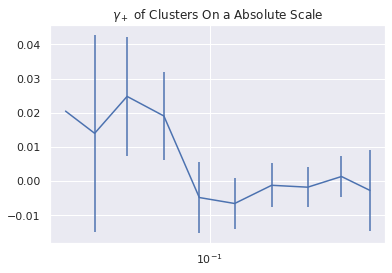

Aggregated xi:
[-0.0205 -1.1078 -5.0878 -6.2434  2.9437  7.056   1.8639  3.4713 -2.647
  1.0844]
------------------------------------------------------------------------------
Aggregated meanlogr:
[   -4.1936  -301.1429  -694.3018  -949.8009 -1510.3488 -2146.6766
 -2365.2445 -2046.7976 -1093.9956   -82.8239]
------------------------------------------------------------------------------
Aggregated npairs:
[1.000e+00 7.900e+01 2.050e+02 3.270e+02 6.190e+02 1.086e+03 1.586e+03
 2.010e+03 1.899e+03 4.070e+02]
------------------------------------------------------------------------------
Mean xi:
[-0.0205 -0.014  -0.0248 -0.0191  0.0048  0.0065  0.0012  0.0017 -0.0014
  0.0027]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.1936 -3.8119 -3.3868 -2.9046 -2.44   -1.9767 -1.4913 -1.0183 -0.5761
 -0.2035]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

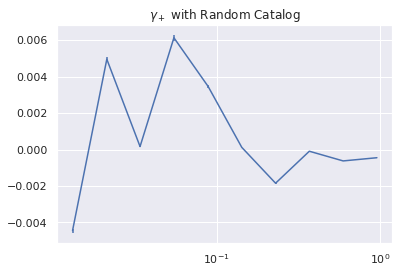

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1191e-04 -1.2480e-04 -4.1830e-06 -1.5443e-04 -8.7219e-05 -3.0522e-06
  4.6474e-05  2.3124e-06  1.5695e-05  1.1269e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

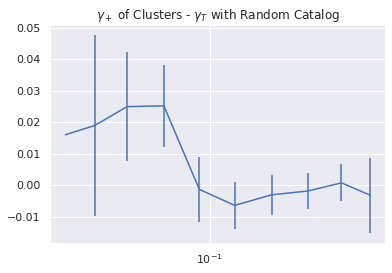

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

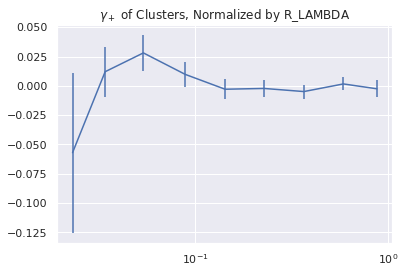

Aggregated xi:
[ 0.      0.9116 -1.7452 -7.0441 -4.6122  2.4719  2.8966  9.1059 -3.5354
  2.8636]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -60.2506  -489.5876  -732.9176 -1142.5515 -1660.4438
 -1922.5486 -1872.5502 -1160.8132  -149.6739]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   16.  145.  251.  472.  854. 1300. 1865. 2181. 1135.]
------------------------------------------------------------------------------
Mean xi:
[    nan  0.057  -0.012  -0.0281 -0.0098  0.0029  0.0022  0.0049 -0.0016
  0.0025]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7657 -3.3765 -2.92   -2.4207 -1.9443 -1.4789 -1.004  -0.5322
 -0.1319]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)